## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID" )
combined_data.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice in the DataFrame.
numberof_mice = combined_data["Mouse ID"].nunique()
numberof_mice

249

In [3]:
combined_data["Mouse ID"].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [4]:
count_allrows = combined_data["Mouse ID"].count()
count_allrows

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
id_duplicates = combined_data[combined_data.duplicated(['Mouse ID'])==True]
id_duplicates[['Mouse ID', 'Timepoint']].head(15)

,Mouse ID,Timepoint
1,k403,5
2,k403,10
3,k403,15
4,k403,20
5,k403,25
6,k403,30
7,k403,35
8,k403,40
9,k403,45
11,s185,5


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data.duplicated(['Mouse ID'])==True].sort_values('Mouse ID')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
458,a203,Infubinol,Female,20,23,20,55.173336,1
463,a203,Infubinol,Female,20,23,45,67.973419,2
462,a203,Infubinol,Female,20,23,40,63.593490,2
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID'])
clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].count()

249

In [9]:
#We see number of unique values in the first version of dataframe and row count of Mouse ID column in cleaned dataframe is same.

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
groupedby_drug = combined_data.set_index("Drug Regimen").groupby(["Drug Regimen"])
mean = groupedby_drug["Tumor Volume (mm3)"].mean()
median = groupedby_drug["Tumor Volume (mm3)"].median()
var = groupedby_drug["Tumor Volume (mm3)"].var()
sd = groupedby_drug["Tumor Volume (mm3)"].std()
sem = groupedby_drug["Tumor Volume (mm3)"].sem()
summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":var, 
                                   "Tumor Volume Std. Dev.":sd, "Tumor Volume Std. Err.":sem})
summary_statistics




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [12]:
mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sum = pd.DataFrame({"Mean":mean, "Median":median, "Var":var, "Std":std, "Sem":sem})
sum

,Mean,Median,Var,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Yay! I found easier and short way to find all aggregates when I search for how to add levels on column name.

In [14]:
pd.pivot_table(combined_data,index=["Drug Regimen"],values=["Tumor Volume (mm3)"],aggfunc=[np.mean,np.median,np.var,np.std,st.sem])

,mean,median,var,std,sem
,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955


## Bar Plots

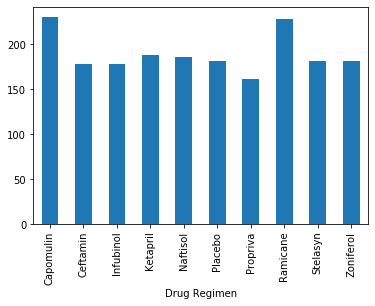

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"].plot(kind="bar")

([<matplotlib.axis.XTick at 0x227298a7278>,
 <a list of 10 Text xticklabel objects>)

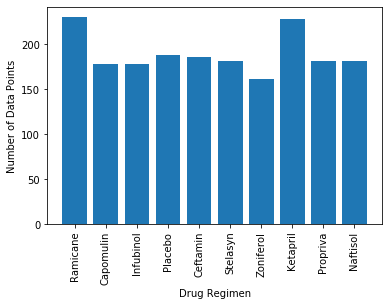

In [16]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

mouse = combined_data.groupby("Drug Regimen")["Mouse ID"].count()
drugs = combined_data["Drug Regimen"].unique()
plt.bar(drugs, mouse)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(drugs, rotation="vertical")

## Pie Plots

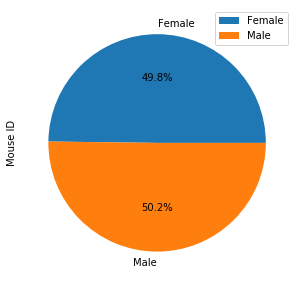

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = pd.DataFrame(clean_data.groupby("Sex")["Mouse ID"].count())
sex_data.plot.pie(y="Mouse ID", figsize=(5, 5),autopct='%1.1f%%')


In [18]:
clean_data.groupby("Sex")["Mouse ID"].count()

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

([<matplotlib.patches.Wedge at 0x2272eb73a58>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

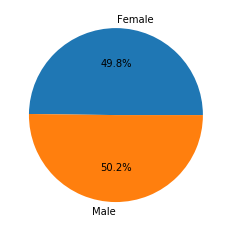

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
number_mouse = clean_data.groupby("Sex")["Mouse ID"].count()
labels = ["Female", "Male"]
plt.pie(number_mouse,labels=labels,autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin  
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [21]:
CAPOMULIN_treated = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
last = pd.DataFrame(CAPOMULIN_treated.groupby("Mouse ID").max()["Timepoint"])
last_tumvol = pd.merge(last, combined_data, on=("Mouse ID", "Timepoint"))
tumvol_CAPOMULIN = last_tumvol["Tumor Volume (mm3)"]

quartiles = tumvol_CAPOMULIN.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumorvolume = last_tumvol.loc[(last_tumvol["Tumor Volume (mm3)"] < lower_bound) | (last_tumvol["Tumor Volume (mm3)"] > upper_bound)]

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [22]:
RAMICINE_treated = combined_data.loc[combined_data['Drug Regimen'] == 'Ramicane']
last = pd.DataFrame(RAMICINE_treated.groupby("Mouse ID").max()["Timepoint"])
last_tumvol = pd.merge(last, combined_data, on=("Mouse ID", "Timepoint"))
tumvol_RAMICINE = last_tumvol["Tumor Volume (mm3)"]

quartiles = tumvol_RAMICINE.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumorvolume = last_tumvol.loc[(last_tumvol["Tumor Volume (mm3)"] < lower_bound) | (last_tumvol["Tumor Volume (mm3)"] > upper_bound)]

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [23]:
INFUBINOL_treated = combined_data.loc[combined_data['Drug Regimen'] == 'Infubinol']
last = pd.DataFrame(INFUBINOL_treated.groupby("Mouse ID").max()["Timepoint"])
last_tumvol = pd.merge(last, combined_data, on=("Mouse ID", "Timepoint"))
tumvol_INFUBINOL = last_tumvol["Tumor Volume (mm3)"]

quartiles = tumvol_INFUBINOL.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumorvolume = last_tumvol.loc[(last_tumvol["Tumor Volume (mm3)"] < lower_bound) | (last_tumvol["Tumor Volume (mm3)"] > upper_bound)]

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [24]:
CEFTAMIN_treated = combined_data.loc[combined_data['Drug Regimen'] == 'Ceftamin']
last = pd.DataFrame(CEFTAMIN_treated.groupby("Mouse ID").max()["Timepoint"])
last_tumvol = pd.merge(last, combined_data, on=("Mouse ID", "Timepoint"))
tumvol_CEFTAMIN = last_tumvol["Tumor Volume (mm3)"]

quartiles = tumvol_CEFTAMIN.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumorvolume = last_tumvol.loc[(last_tumvol["Tumor Volume (mm3)"] < lower_bound) | (last_tumvol["Tumor Volume (mm3)"] > upper_bound)]

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

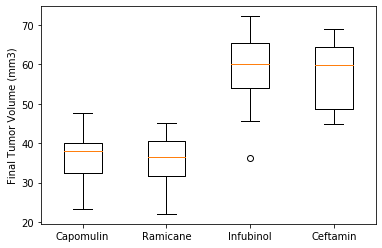

In [26]:
last_tumvols_bytreat = [tumvol_CAPOMULIN, tumvol_RAMICINE, tumvol_INFUBINOL, tumvol_CEFTAMIN]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(last_tumvols_bytreat, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]  )
plt.show()

## Line and Scatter Plots

In [27]:
capomulin_treated = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
print(f'Mouse IDs: {capomulin_treated["Mouse ID"].unique()}')

Mouse IDs: ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


In [ ]:
mouse = input("Which mouse do you want to check? ")

In [11]:
mouse

'l509'

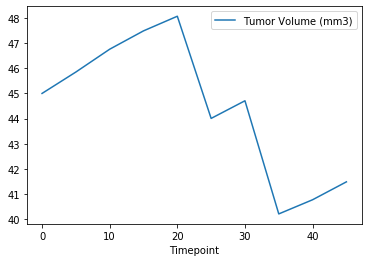

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_treated = combined_data[(combined_data["Drug Regimen"] == "Capomulin") 
                                    & (combined_data["Mouse ID"] == f"{mouse}")]
capomulin_treated.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")


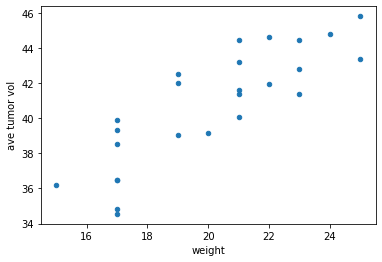

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_treated = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

capomulin_mouse_weight = capomulin_treated.groupby(['Mouse ID'])["Weight (g)"].mean()
capomulin_mouse_tumvol = capomulin_treated.groupby(['Mouse ID'])["Tumor Volume (mm3)"].mean()

capomulin_mouse = pd.DataFrame({"weight":capomulin_mouse_weight, "ave tumor vol":capomulin_mouse_tumvol})
capomulin_mouse.plot(kind="scatter", x="weight", y="ave tumor vol")

## Correlation and Regression

In [43]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_mouse_weight, capomulin_mouse_tumvol)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")



The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


The equation of the regression line is: y = 0.95x + 21.55


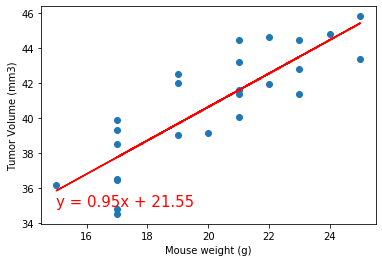

In [50]:
x_values = capomulin_mouse_weight
y_values = capomulin_mouse_tumvol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,35),fontsize=15,color="red")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

print(f"The equation of the regression line is: {line_eq}")
